In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path
%matplotlib inline

In [2]:
path.insert(0, '../src')
from data_generator import DataGenerator
from model_trainer import ModelTrainer

In [50]:
from data_transformation import get_better_spectra, get_precise_peaks
dg = DataGenerator('../data/classification_cas_data.csv')
norm_data = dg.df()
chans, intens, names = get_better_spectra()
data = pd.DataFrame(list(zip(chans, intens, names)), columns=['precise_channels', 'precise_intensities', 'file_name'])
norm_data.sort_values('file_name', inplace=True)
data.sort_values('file_name', inplace=True)
dg.set_df(pd.merge(data, norm_data, on='file_name'))
norm_data = dg.df()
dg.set_df(norm_data)
peaks = get_precise_peaks(norm_data, ['precise_channels', 'precise_intensities'])
norm_data['peaks'] = peaks

In [51]:
peaks = get_precise_peaks(norm_data, ['precise_channels', 'precise_intensities'])
norm_data['peaks'] = peaks

In [52]:
dg.set_df(norm_data)

In [7]:
elements = []
spots = []
freqs = []
with open('../data/Elements.txt') as file:
    for line in file.readlines():
        element_spots = []
        element_freqs = []
        sections = line.split('(')
        elements.append(sections[0].split()[2])
        for tup in sections[1:]:
            nums = tup.split(',')
            element_spots.append(float(nums[0]))
            element_freqs.append(float(nums[1].split(')')[0]))
        spots.append(element_spots)
        freqs.append(element_freqs)

In [30]:
isotopes = [0 for x in range(300)]
for row in isotope_data.itertuples():
    for i, isotope in enumerate(row[2]):
        isotopes.append(isotope)
        freqs.append(row[3][i])

In [8]:
isotope_data = pd.DataFrame(list(zip(elements, spots, freqs)), columns=['Element', 'Isotope Masses', 'Isotope Frequencies'])
isotope_data.head(10)

,Element,Isotope Masses,Isotope Frequencies
0,Hydrogen,"[1.00782, 2.0141, 3.016049]","[0.99985, 0.00015, 0.0]"
1,Helium,"[3.016029, 4.002603]","[1.3e-06, 0.999999]"
2,Lithium,"[6.01512, 7.016]","[0.0752, 0.9248]"
3,Beryllium,[9.01218],[1.0]
4,Boron,"[10.01294, 11.0093]","[0.1898, 0.8102]"
5,Carbon,"[12.0, 13.00335, 14.003242]","[0.98892, 0.01108, 0.0]"
6,Nitrogen,"[14.00307, 15.00011]","[0.99635, 0.00365]"
7,Oxygen,"[15.9949, 16.99913, 17.99916]","[0.99759, 0.00037, 0.00204]"
8,Fluorine,[18.9984],[1.0]
9,Neon,"[19.9924, 20.9938, 21.99138]","[0.9092, 0.00257, 0.0882]"


In [34]:
a = sorted(zip(isotopes, freqs))
isos = [x for x, y in a]
freqs = [y for x, y in a]

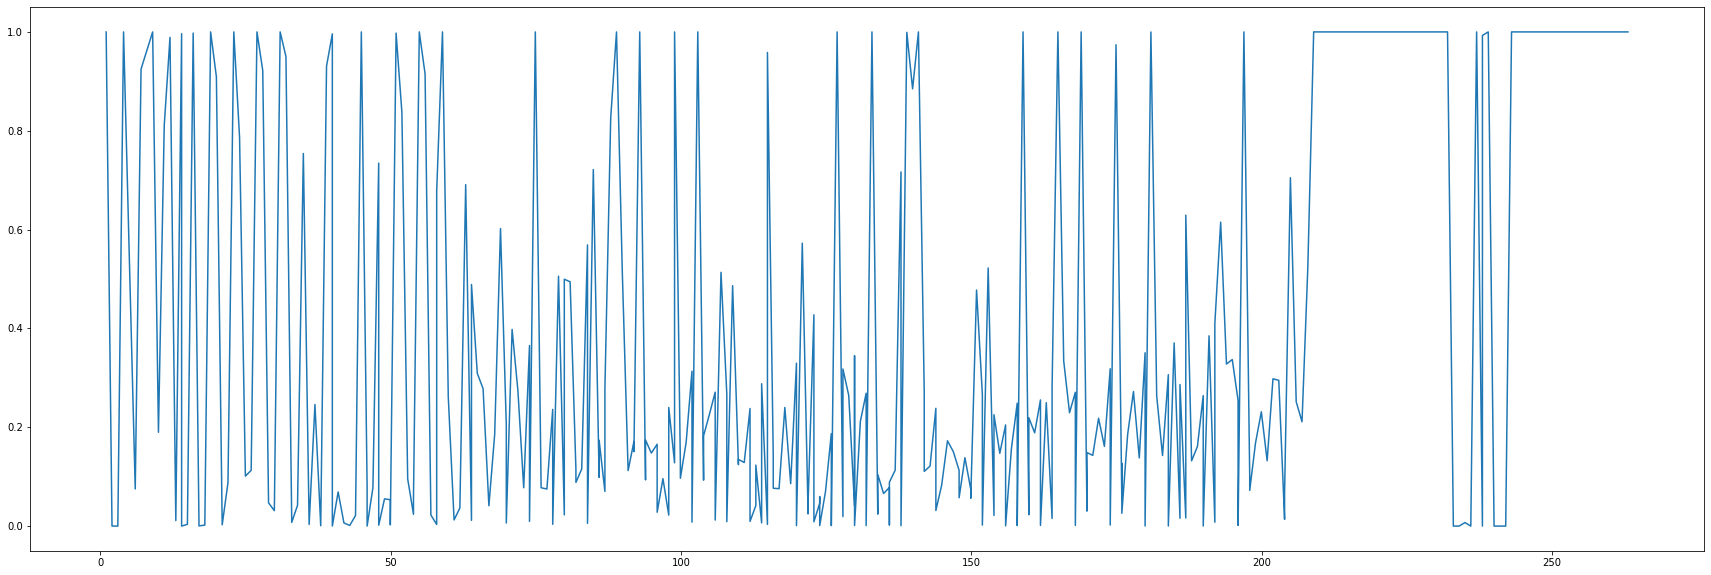

In [56]:
plt.figure(figsize=(30, 10))
plt.plot(isos, freqs)

In [9]:
nom_masses_low = [num for num in range(266)]
for masses in isotope_data['Isotope Masses']:
    for mass in masses:
        if isinstance(nom_masses_low[round(mass)], int) or mass < nom_masses_low[round(mass)]:
            nom_masses_low[round(mass)] = mass
nom_masses_high = [num for num in range(266)]
for masses in isotope_data['Isotope Masses']:
    for mass in masses:
        if isinstance(nom_masses_low[round(mass)], int) or mass > nom_masses_high[round(mass)]:
            nom_masses_high[round(mass)] = mass

In [10]:
from data_transformation import get_avg_p_beyond, get_peaks_below_nom_masses
def plot_avg_dist(df, low, high, nom_masses, lim=1):
    generator = DataGenerator(df=df)
    generator.set_df(generator.error_df(low, high, use_ranges=True))
    data = generator.calibrated_df()
    data['peaks_below'] = data['masses'].apply(get_peaks_below_nom_masses, args=(nom_masses,))
    data['avg_p_below_dist'] = data['peaks_below'].apply(get_avg_p_beyond, args=(nom_masses, True,))
    norm_avg_dist = data['avg_p_below_dist'][data['target']==0]
    offset_err_avg_dist = data['avg_p_below_dist'][data['target']==1]
    slope_err_avg_dist = data['avg_p_below_dist'][data['target']==2]
    both_err_avg_dist = data['avg_p_below_dist'][data['target']==3]
    plt.figure(figsize=(20, 10))
    plt.hist(norm_avg_dist, bins=50, alpha=0.5, label='Calibrated')
    plt.hist(offset_err_avg_dist, bins=50, alpha=0.5, label='Offset')
    plt.hist(slope_err_avg_dist, bins=50, alpha=0.5, label='Slope')
    plt.hist(both_err_avg_dist, bins=50, alpha=0.5, label='Both')
    plt.legend(loc='upper right')
    plt.title('Avg Distance From Floor ' + str(high * 100) + '% - ' + str(low * 100) + '%')
    plt.xlabel('Distances (amu)')
    plt.ylabel('Count')
    plt.xlim(0, lim)
    plt.show()

2.0 2.0


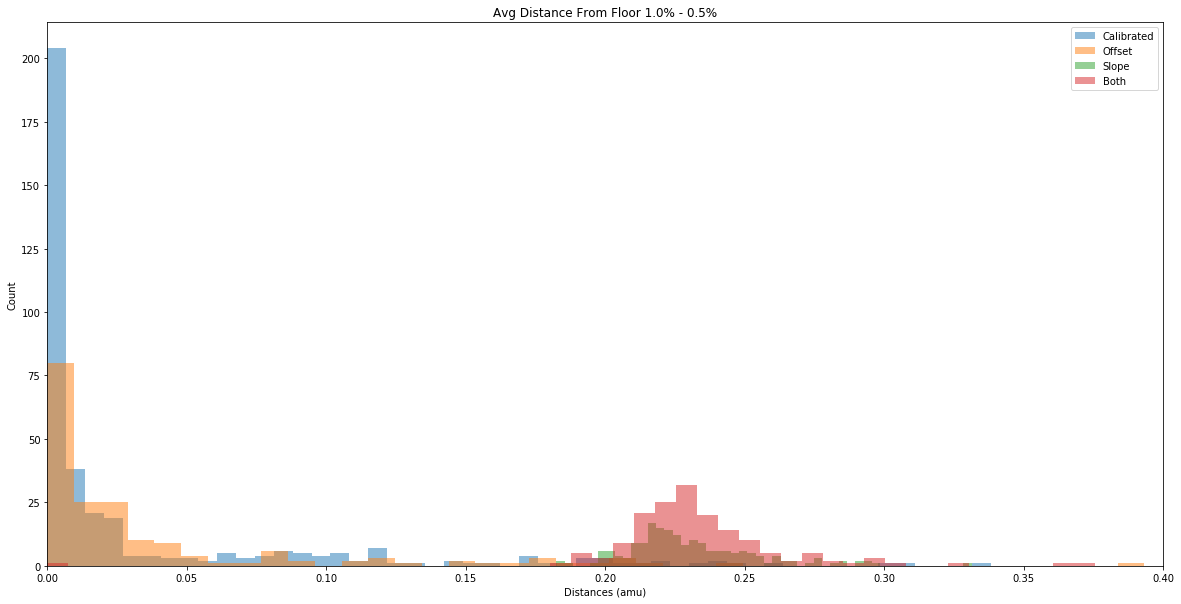

In [130]:
plot_avg_dist(norm_data, .005, .01, nom_masses_low, 0.4)

In [10]:
def plot_avg_num(df, low, high, nom_masses):
    generator = DataGenerator(df=df)
    generator.set_df(generator.error_df(low, high, use_ranges=True))
    data = generator.calibrated_df()
    data['peaks_below'] = data['masses'].apply(get_peaks_below_nom_masses, args=(nom_masses,))
    data['num_peaks_below'] = data['peaks_below'].apply(len)
    norm_avg_num = data['num_peaks_below'][data['target']==0]
    offset_avg_num = data['num_peaks_below'][data['target']==1]
    slope_avg_num = data['num_peaks_below'][data['target']==2]
    both_avg_num = data['num_peaks_below'][data['target']==3]
    plt.figure(figsize=(20, 10))
    plt.hist(norm_avg_num, bins=50, alpha=0.5, label='Calibrated')
    plt.hist(offset_avg_num, bins=50, alpha=0.5, label='Offset')
    plt.hist(slope_avg_num, bins=50, alpha=0.5, label='Slope')
    plt.hist(both_avg_num, bins=50, alpha=0.5, label='Both')
    plt.legend(loc='upper right')
    plt.title('Avg Number of Peaks Below Floor '  + str(high * 100) + '% - ' + str(low * 100) + '%')
    plt.xlabel('Number of Peaks')
    plt.ylabel('Count')
    plt.show()

In [54]:
norm_data

,precise_channels,precise_intensities,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,peaks


In [26]:
from data_transformation import get_peaks_near_nom_masses
def augment_value(value, amount=0.1, sign=-1):
    '''
    Takes in value and adds / subtracts amount of itself from
    itself based on sign.
    '''
    return value  + sign * amount * value

dg.set_df(dg.error_df(0.005, 0.01, use_ranges=True, ranges=[0, 0, .5]))
data = dg.calibrated_df()

In [48]:
data

,precise_channels,precise_intensities,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,peaks,target,err_prop_slope,err_prop_offset,mass_channels,masses,intensities


In [22]:
def get_peak_data(df, num=20):
    '''
    Takes in calibrated ToF DataFrame with peak masses, gets suspicious peaks 
    above and below isotope masses. Returns new dataframe with a column for 
    peaks below and above, dists below and above, as well as avgs for both and
    number of peaks above and below.
    
    Arguments-----
    df: dataframe with mass and peak data
    num: how many suspicious peaks to store in dataframe, default gets 20 peaks
    '''
    data = df.copy()
    peak_data_below = data['masses'].apply(get_peaks_near_nom_masses, args=(nom_masses_low, -1, False))
    peak_data_above = data['masses'].apply(get_peaks_near_nom_masses, args=(nom_masses_high, -1, True))
    peaks_below = []
    peaks_above = []
    dists_below = []
    dists_above = []
    num_above = []
    num_below = []
    for i, tup in enumerate(peak_data_above):
        below = [x for x in peak_data_below[i][1] if x < -0.0001]
        above = [x for x in peak_data_above[i][1] if x > 0.0001]
        num_above.append(len(above))
        num_below.append(len(below))
        zeroes_below = [0 for x in range(num - len(below))]
        zeroes_above = [0 for x in range(num - len(above))]
        _ = peak_data_below[i][0][0:max(len(below), num)]
        peaks_below.append((_ + zeroes_below)[0:num])
        _ = peak_data_above[i][0][0:max(len(above), num)]
        peaks_above.append((_ + zeroes_above)[0:num])
        dists_below.append((below + zeroes_below)[0:num])
        dists_above.append((above + zeroes_above)[0:num])

    data['peaks_below'] = peaks_below
    data['peaks_above'] = peaks_above
    data['dists_above'] = dists_above
    data['dists_below'] = dists_below
    data['avg_p_below_dist'] = data['peaks_below'].apply(get_avg_p_beyond, args=(nom_masses_low, True,))
    data['avg_p_above_dist'] = data['peaks_above'].apply(get_avg_p_beyond, args=(nom_masses_high, True,))
    data['num_peaks_below'] = num_above
    data['num_peaks_above'] = num_below
    return data

In [13]:
from sklearn.manifold import TSNE
def dimen_reduc_tsne(data, prefix, num=20, comps=2, random_state=42):
    '''
    Takes dataframe created by get_peak_data and reduces the dimensions of the dists or peaks
    above or below isotope mass using tSNE.
    Arguments ------
    data: dataframe from get_peak_data
    prefix: either 'dists' or 'peaks'
    num: min number of peaks to look at, default 20
    comps: # of components to reduce to, default 2
    random_state: random state of tsne object
    '''
    if prefix not in ['dists', 'peaks']:
        print("Error: Prefix should be 'dists' or 'peaks'")
        return None

    ab_col = '' + prefix + '_above'
    bel_col = '' + prefix + '_below'
    tsne = TSNE(n_components=comps, random_state=random_state)
    above = np.vstack([np.array(x) for x in data[data[ab_col].apply(len) >=num][ab_col]])
    above = tsne.fit_transform(above)
    below = np.vstack([np.array(x) for x in data[data[bel_col].apply(len) >=num][bel_col]])
    below = tsne.fit_transform(below)
    return above, below

In [14]:
from sklearn.decomposition import PCA
def dimen_reduc_pca(data, prefix, num=20, comps=2, random_state=42):
    '''
    Takes dataframe created by get_peak_data and reduces the dimensions of the dists or peaks
    above or below isotope mass using tSNE.
    Arguments ------
    data: dataframe from get_peak_data
    prefix: either 'dists' or 'peaks'
    num: min number of peaks to look at, default 20
    comps: # of components to reduce to, default 2
    random_state: random state of tsne object
    '''
    if prefix not in ['dists', 'peaks']:
        print("Error: Prefix should be 'dists' or 'peaks'")
        return None

    ab_col = '' + prefix + '_above'
    bel_col = '' + prefix + '_below'
    pca = PCA(n_components=comps, random_state=random_state)
    above = np.vstack([np.array(x) for x in data[data[ab_col].apply(len) >=num][ab_col]])
    above = pca.fit_transform(above)
    below = np.vstack([np.array(x) for x in data[data[bel_col].apply(len) >=num][bel_col]])
    below = pca.fit_transform(below)
    return above, below

In [25]:
data2 = get_peak_data(data)
test_data = data2[data2['dists_below'].apply(len) >= 20].copy()

Series([], Name: masses, dtype: float64)


In [21]:
data['dists_above'].apply(len).describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: dists_above, dtype: float64

In [17]:
above, below = dimen_reduc_tsne(test_data, 'dists')
test_data['dists_below_component_x'] = below[:, 0]
test_data['dists_below_component_y'] = below[:, 1]
test_data['dists_above_component_x'] = above[:, 0]
test_data['dists_above_component_y'] = above[:, 1]

ValueError: need at least one array to concatenate

In [ ]:
def plot_components(df, prefix='dists', tsne=True):
    data = get_peak_data(df)
    data = data.copy()
    above, below = None, None
    if tsne:
        above, below = dimen_reduc_tsne(data, prefix)
    else:
        above, below = dimen_reduc_pca(data, prefix)
        
    data['' + prefix + '_below_component_x'] = below[:, 0]
    data['' + prefix + '_below_component_y'] = below[:, 1]
    data['' + prefix + '_above_component_x'] = above[:, 0]
    data['' + prefix + '_above_component_y'] = above[:, 1]
    fig, axs = plt.subplots(2)
    fig.set_size_inches(20, 10)
    hue = None
    if 'target' in data.columns:
        hue='target'
    sns.scatterplot('' + prefix + '_above_component_x', '' + prefix + '_above_component_y', data=data, style='technique', hue=hue, ax=axs[0], palette='Accent')
    sns.scatterplot('' + prefix + '_below_component_x', '' + prefix + '_below_component_y', data=data, style='technique', hue=hue, ax=axs[1], palette='Accent')
    plt.show()
    return data

### Plot Dimension Reduced Data Points with tSNE 

In [ ]:
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.005, 0.01, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'dists')

In [ ]:
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.0005, 0.001, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'dists')

2.0 2.0


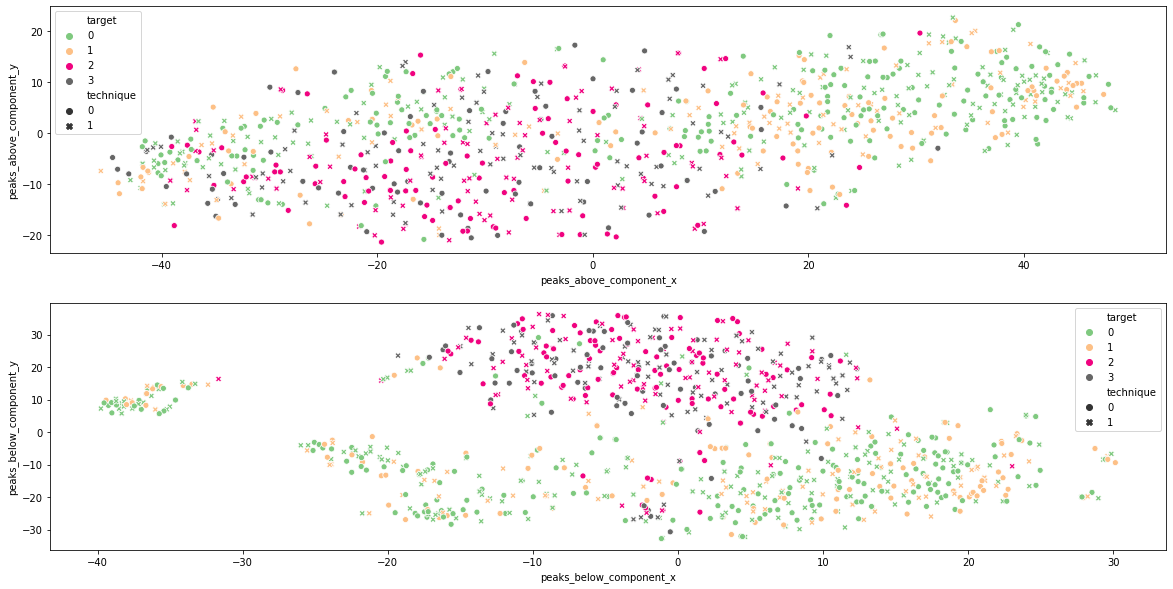

In [88]:

dg.set_df(norm_data)
dg.set_df(dg.error_df(0.005, 0.01, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'peaks')

2.9999999999999996 1.9999999999999982


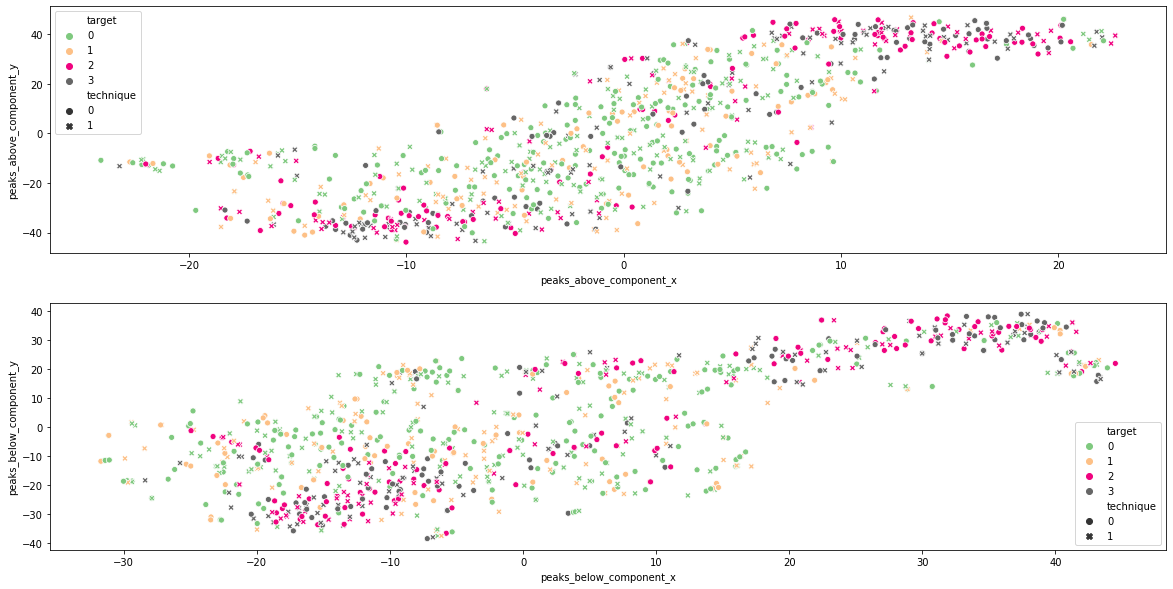

In [89]:
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.0005, 0.001, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'peaks')

### Plot Dimension Reduced Data Points using PCA

2.0 2.0


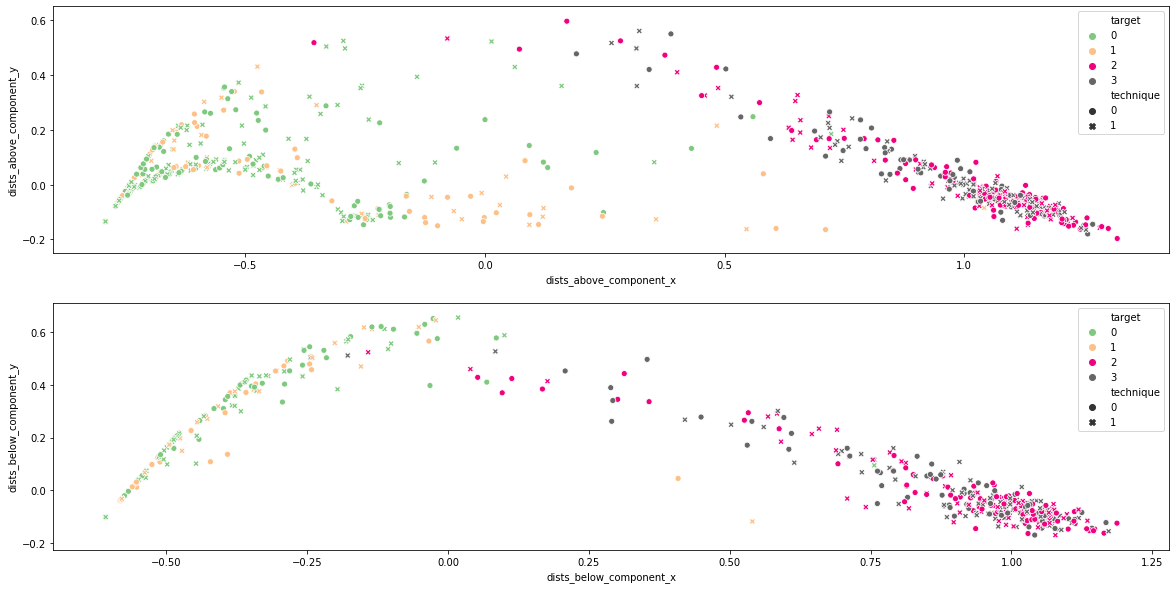

In [101]:
# PCA Large Error
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.005, 0.01, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'dists', False)

2.9999999999999996 1.9999999999999982


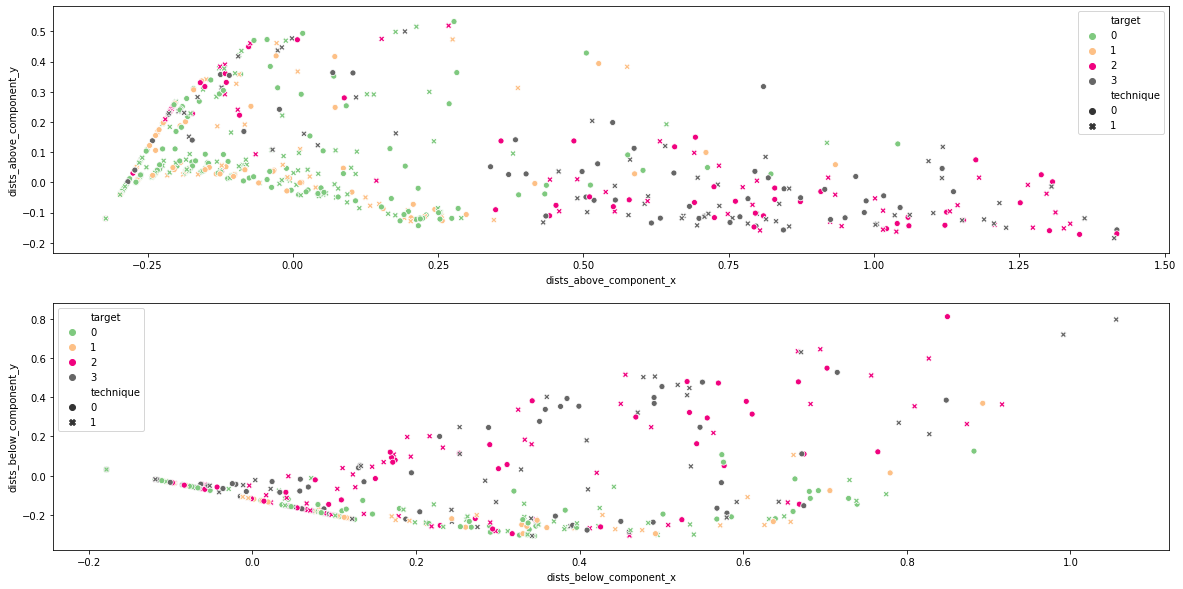

In [100]:
#PCA Little Error
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.0005, 0.001, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'dists', False)

2.0 2.0


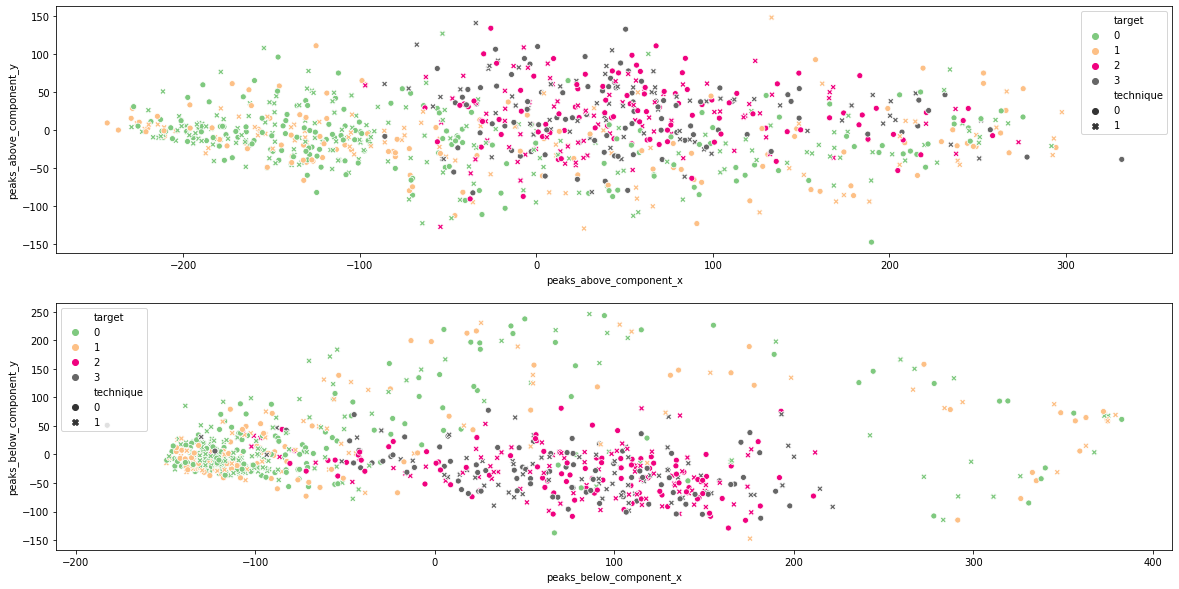

In [102]:
#PCA Large Error
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.005, 0.01, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'peaks', False)

2.9999999999999996 1.9999999999999982


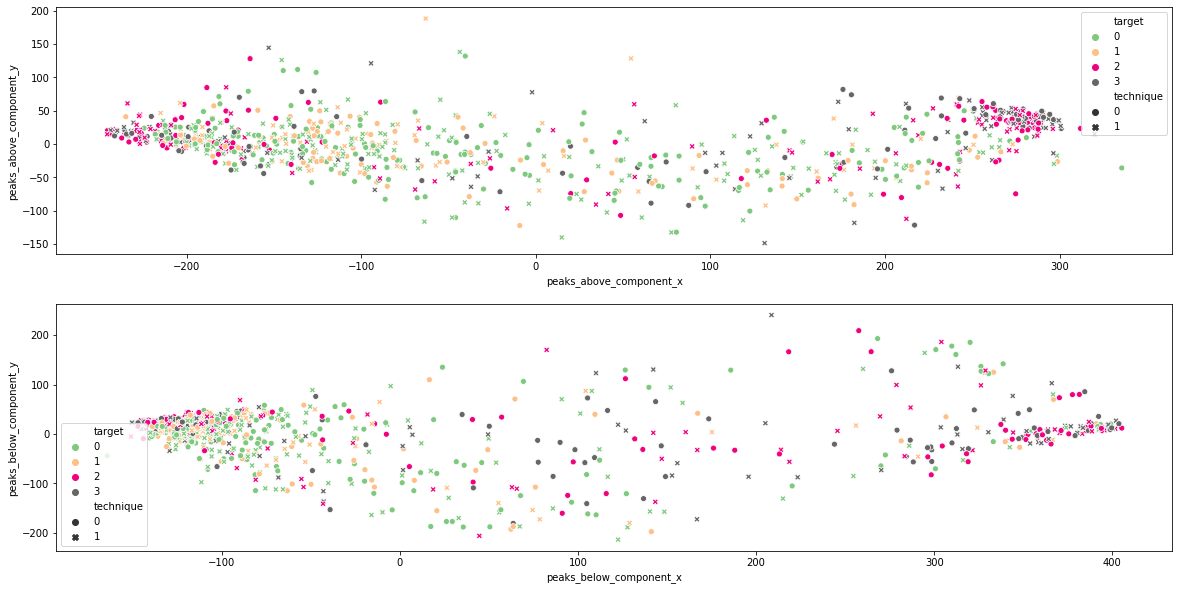

In [103]:
#PCA Little Error
dg.set_df(norm_data)
dg.set_df(dg.error_df(0.0005, 0.001, use_ranges=True))
_ = plot_components(dg.calibrated_df(), 'peaks', False)

In [104]:
from data_transformation import mass_formula, augment_value
add_slopess = []
add_slope_offsetss = []
add_offsetss = []
sub_slopess = []
sub_slope_offsetss = []
sub_offsetss = []
for row in data.iterrows():
    add_slope = augment_value(row[1]['Mass/Time'], 0.1, sign=1)
    add_offset = augment_value(row[1]['MassOffset'], 0.1, sign=1)
    sub_slope = augment_value(row[1]['Mass/Time'], 0.1, sign=-1)
    sub_offset = augment_value(row[1]['MassOffset'], 0.1, sign=-1)
    m_over_t = row[1]['Mass/Time']
    m_offset = row[1]['MassOffset']
    add_slopes = []
    add_slope_offsets = []
    add_offsets = []
    sub_slopes = []
    sub_slope_offsets = []
    sub_offsets = []
    spec = row[1]['SpecBinSize']
    time = row[1]['StartFlightTime']
    for tup in row[1]['peaks']:
            add_slopes.append(mass_formula(tup[0], spec, time, add_slope, m_offset))
            add_slope_offsets.append(mass_formula(tup[0], spec, time, add_slope, add_offset))
            add_offsets.append(mass_formula(tup[0], spec, time, m_over_t, add_offset))
            sub_slopes.append(mass_formula(tup[0], spec, time, sub_slope, m_offset))
            sub_slope_offsets.append(mass_formula(tup[0], spec, time, sub_slope, sub_offset))
            sub_offsets.append(mass_formula(tup[0], spec, time, m_over_t, sub_offset))
    add_slopess.append(add_slopes)
    add_slope_offsetss.append(add_slope_offsets)
    add_offsetss.append(add_offsets)
    sub_slopess.append(sub_slopes)
    sub_slope_offsetss.append(sub_slope_offsets)
    sub_offsetss.append(sub_offsets)

In [105]:
mass_lists = [add_slopess, add_slope_offsetss, add_offsetss, sub_slopess, sub_slope_offsetss, sub_offsetss]
avgs = []
nums = []
for li in mass_lists:
    p_below = pd.Series(li).apply(get_peaks_below_nom_masses, args=(nom_masses_low,))
    avg_p_below = pd.Series(p_below).apply(get_avg_p_beyond, args=(nom_masses_low, ))
    num_p_below = []
    for ps in p_below:
        num_p_below.append(len(ps))
    avgs.append(avg_p_below)
    nums.append(num_p_below)

In [108]:
data['Add_Error_Slope_Avg_Floor_Distance'] = avgs[0]
data['Add_Error_Offset_Slope_Avg_Floor_Distance'] = avgs[1]
data['Add_Error_Offset_Avg_Floor_Distance'] = avgs[2]
data['Sub_Error_Slope_Avg_Floor_Distance'] = avgs[3]
data['Sub_Error_Slope_Offset_Avg_Floor_Distance'] = avgs[4]
data['Sub_Error_Offset_Avg_Floor_Distance'] = avgs[5]

In [109]:
data['Add_Error_Slope_Num_Peaks_Below'] = nums[0]
data['Add_Error_Offset_Slope_Num_Peaks_Below'] = nums[1]
data['Add_Error_Offset_Num_Peaks_Below'] = nums[2]
data['Sub_Error_Slope_Num_Peaks_Below'] = nums[3]
data['Sub_Error_Slope_Offset_Num_Peaks_Below'] = nums[4]
data['Add_Error_Offset_Num_Peaks_Below'] = nums[5]

In [138]:
norm_data.head()

,precise_channels,precise_intensities,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,technique,peaks
0,0 2645.71516 1 3506.21009 2 ...,0 73869 1 1234 2 130 3 ...,0106301.cas,0.387425,-0.275047,0.0,1.248,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[(2645.71516, 73869), (3506.21009, 1234), (416..."
1,0 2648.38807 1 3510.15457 2 ...,0 49864 1 1034 2 32 3 ...,0107316.cas,0.387337,-0.278302,0.0,1.248,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[(2648.38807, 49864), (3510.15457, 1034), (416..."
2,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 0 1 0 2 0 3 0 4 0 ...,0110203.cas,0.378938,-0.271015,0.0,4.992,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[(1973.72345, 23371), (2049.2615, 74777), (212..."
3,0 672.01357 1 891.85035 2 106...,0 34399 1 304 2 45 3 ...,0110212.cas,0.379297,-0.269824,0.0,4.992,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[(672.0135700000001, 34399), (891.85035, 304),..."
4,0 2727.76914 1 3595.33615 2 ...,0 42995 1 349 2 151 3 ...,0116511.cas,0.383481,-0.302161,0.0,1.248,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[(2727.76914, 42995), (3595.33615, 349), (4265..."


In [135]:
norm_avg_num

1      0.288975
2      0.269574
4      0.325310
5      0.321647
7      0.327849
         ...   
889    0.214194
891    0.253081
893    0.174021
896    0.003063
897    0.118734
Name: Add_Error_Offset_Avg_Floor_Distance, Length: 354, dtype: float64

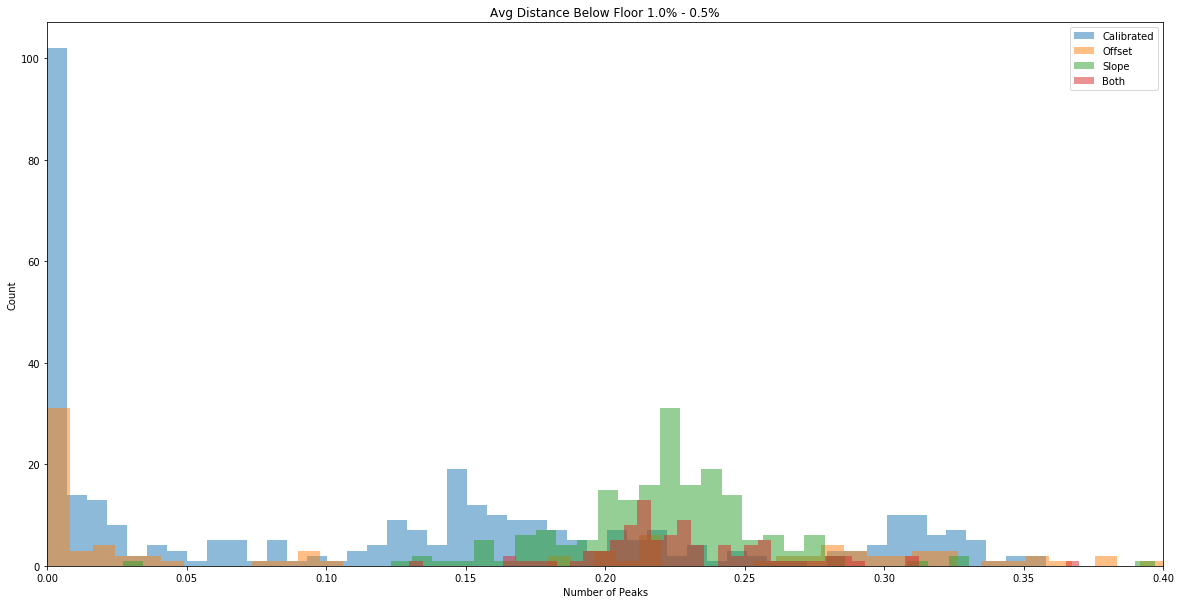

In [136]:
norm_avg_num = data[(data['target']==0)]['Add_Error_Offset_Avg_Floor_Distance']
offset_avg_num = data[(data['target']==1) & (data['err_prop_offset'] < 0)]['Add_Error_Offset_Avg_Floor_Distance']
slope_avg_num = data[(data['target']==2)]['Add_Error_Offset_Avg_Floor_Distance']
both_avg_num = data[(data['target']==3) & (data['err_prop_offset'] < 0)]['Add_Error_Offset_Avg_Floor_Distance']
plt.figure(figsize=(20, 10))
plt.hist(norm_avg_num, bins=50, alpha=0.5, label='Calibrated')
plt.hist(offset_avg_num, bins=50, alpha=0.5, label='Offset')
plt.hist(slope_avg_num, bins=50, alpha=0.5, label='Slope')
plt.hist(both_avg_num, bins=50, alpha=0.5, label='Both')
plt.legend(loc='upper right')
plt.title('Avg Distance Below Floor '  + str(.01 * 100) + '% - ' + str(.005 * 100) + '%')
plt.xlabel('Number of Peaks')
plt.ylabel('Count')
plt.xlim((0, 0.4))
plt.show()

In [119]:
data[data['target']==2]

,precise_channels,precise_intensities,file_name,Mass/Time,MassOffset,StartFlightTime,SpecBinSize,channels,technique,peaks,...,Add_Error_Offset_Slope_Avg_Floor_Distance,Add_Error_Offset_Avg_Floor_Distance,Sub_Error_Slope_Avg_Floor_Distance,Sub_Error_Slope_Offset_Avg_Floor_Distance,Sub_Error_Offset_Avg_Floor_Distance,Add_Error_Slope_Num_Peaks_Below,Add_Error_Offset_Slope_Num_Peaks_Below,Add_Error_Offset_Num_Peaks_Below,Sub_Error_Slope_Num_Peaks_Below,Sub_Error_Slope_Offset_Num_Peaks_Below
0,0 2645.71516 1 3506.21009 2 ...,0 73869 1 1234 2 130 3 ...,0106301.cas,0.383581,-0.275047,0.000,1.248,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[(2645.71516, 73869), (3506.21009, 1234), (416...",...,0.212945,0.239185,0.227472,0.224623,0.199470,52,57,64,63,59
12,0 0.00000 1 0.00000 2 ...,0 0 1 0 2 0 3 0 4 ...,021395~1.cas,0.171754,-0.514026,16.123,10.000,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0,"[(717.26573, 27457), (801.0, 206706), (881.001...",...,0.196502,0.185330,0.219488,0.232042,0.221055,58,54,57,57,58
28,0 0.00000 1 0.00000 2 ...,0 0 1 0 2 0 3 0 4 ...,030695~5.cas,0.168657,-0.510894,13.453,10.000,"[1, 0, 3, 3, 3, 0, 1, 0, 0, 1, 1, 0, 1, 2, 3, ...",1,"[(992.00223, 735), (1075.99661, 996), (1156.19...",...,0.222931,0.235064,0.213440,0.216097,0.155743,56,55,51,58,58
33,0 717.22435 1 864.20451 2 102...,0 63 1 85 2 70 3 118 4 ...,0312206.cas,0.381907,-0.266999,0.000,4.992,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[(717.22435, 63), (864.2045099999999, 85), (10...",...,0.188939,0.232189,0.209904,0.242649,0.223985,67,63,60,71,70
34,0 8616.32684 1 10363.96169 2 1...,0 5103 1 223 2 66 3 ...,0317401.cas,0.385001,-1.046581,0.000,0.624,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[(8616.32684, 5103), (10363.96169, 223), (1170...",...,0.213711,0.275455,0.224615,0.217376,0.211732,62,60,56,58,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,0 1407.39563 1 3346.10851 2 ...,0 645801 1 106 2 0 3 ...,TCPB02.cas,0.170471,-0.256281,5.596,1.250,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, ...",0,"[(1407.39563, 645801), (3346.10851, 106), (128...",...,0.214355,0.221633,0.227195,0.225915,0.199753,46,55,59,56,52
871,0 0.00000 1 0.00000 2 ...,0 0 1 0 2 0 3 ...,TEDLAR01.cas,0.172290,-0.512308,16.050,1.250,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0,"[(5738.5021, 8594), (6404.19623, 15157), (7044...",...,0.202945,0.191524,0.223905,0.219729,0.210690,54,58,62,58,61
892,0 0.00000 1 0.00000 2 ...,0 0 1 0 2 0 3 ...,ZD15_01.cas,0.375589,0.000086,0.000,0.276,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[(33184.210080000004, 618272), (34543.42003, 9...",...,0.219961,0.221244,0.195694,0.195828,0.221532,41,41,36,51,51
900,0 9678.41613 1 0.00000 2 ...,0 31 1 0 2 0 3 ...,ZDIAC_O1.cas,0.374913,-0.000125,0.000,0.276,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0,"[(9678.41613, 31), (33183.02428, 654819), (345...",...,0.207995,0.233586,0.221940,0.221754,0.235948,60,60,62,60,60
